![Outlier.png](attachment:Outlier.png)


## Outlier

- An outlier is an extreme value that lies far from the most data points in a variable. 



### Handling outliers

- Outliers can either be a wrong value, such as age 300 years or just variance, such as 210 kilo gram.

- If a value is wrong, we can delete them; otherwise we may have to treat them.


### Possibilities for an Outlier!

- Measurement error during experiment or data may entered wrong.
- Missing values may entered as extreme numbers.
- Data may be not from the same sample.
- Not an error, just variance
- Extreme distribution than normal.

### Effect of outliers on EDA

- Affects numerical measures, such as mean and standard deviation
- Affects correlation


### Drop outliers or not

- We must study the dataset with and without outliers in order to better grasp the implications of the findings before eliminating the outliers.
- You can drop the outlier if you noticed that it is clear that it was entered or measured wrongly. Nothing wrong in that instance.
- If you notice that your assumptions are changing, you can immediately drop the outlier if the findings remain the same.
- If the anomaly has an impact on your results and assumptions. Without hesitation, disregard the anomaly and get on with your next steps.

### Finding outliers

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [23]:
diabetes = pd.read_excel('ML101 Dataset_4 diabetes.xlsx') # reading the file 
diabetes

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


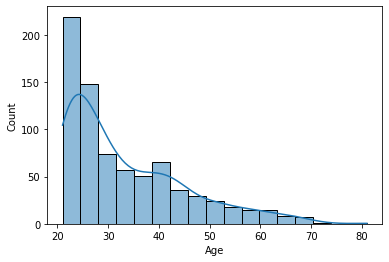

In [4]:
sns.histplot(data = diabetes['Age'], kde = True)
plt.show()

### Boxplot is used to check whether outliers are presnt or not  (yes or no )

<AxesSubplot:ylabel='Age'>

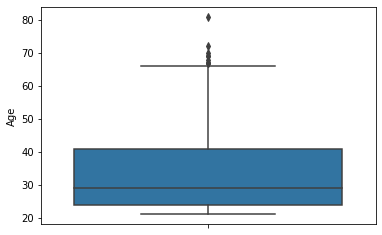

In [5]:
sns.boxplot(y=diabetes["Age"])

<AxesSubplot:xlabel='Age'>

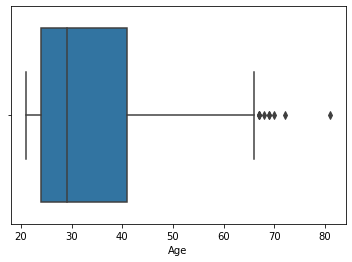

In [6]:
sns.boxplot(x=diabetes["Age"])

In [7]:
stats.zscore(diabetes["Age"])

0      1.425995
1     -0.190672
2     -0.105584
3     -1.041549
4     -0.020496
         ...   
763    2.532136
764   -0.531023
765   -0.275760
766    1.170732
767   -0.871374
Name: Age, Length: 768, dtype: float64

In [12]:
df1 = pd.DataFrame(stats.zscore(diabetes["Age"]))
df1

,Age
0,1.425995
1,-0.190672
2,-0.105584
3,-1.041549
4,-0.020496
...,...
763,2.532136
764,-0.531023
765,-0.275760
766,1.170732


In [27]:
df1[(df1["Age"]>3) | (df1["Age"]<-3)]

,Age
123,3.042663
453,3.297926
459,4.063716
666,3.127750
684,3.042663


In [14]:
df1[df1["Age"]<-3]

,Age


In [8]:
from scipy import stats 
z = np.abs(stats.zscore(diabetes["Age"]))
print(z)

0      1.425995
1      0.190672
2      0.105584
3      1.041549
4      0.020496
         ...   
763    2.532136
764    0.531023
765    0.275760
766    1.170732
767    0.871374
Name: Age, Length: 768, dtype: float64


In [9]:
threshold = 3
print(np.where(z>3))

(array([123, 453, 459, 666, 684], dtype=int64),)


In [10]:
threshold = -3
print(np.where(z<-3))

(array([], dtype=int64),)


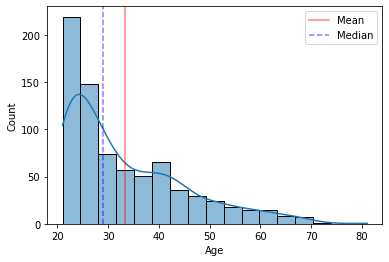

In [ ]:
sns.histplot(data = diabetes['Age'], kde = True)
plt.axvline(x=diabetes.Age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=diabetes.Age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

<AxesSubplot:ylabel='Age'>

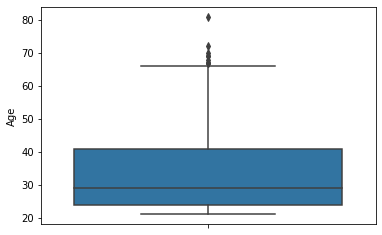

In [ ]:
sns.boxplot(y=diabetes['Age'])

### Approaches can be used

- outlier replacements using computed **mean**. 
- outlier replacements using computed median. 
- outlier replacements using grouped mean, if classification approach. 
- outlier replacements using grouped median if classification approach. 
- outlier removal or the filling of missing values (Z score and/or IQR)

**Z score**

- Calculating standard normal distribution.
- Describe any data point by finding the relationship between the mean and standard deviation of the data points.
- It finds the data distribution where the mean is 0, and the standard deviation is 1.
- if the Z-score value is greater than 3 or less than -3, respectively, that data point will be identified as an outlier.


![Z_score_outlier_detection.jpeg](attachment:Z_score_outlier_detection.jpeg)


In [ ]:
z = np.abs(stats.zscore(diabetes['Age']))
print(z)

0      1.425995
1      0.190672
2      0.105584
3      1.041549
4      0.020496
         ...   
763    2.532136
764    0.531023
765    0.275760
766    1.170732
767    0.871374
Name: Age, Length: 768, dtype: float64


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([123, 453, 459, 666, 684], dtype=int64),)


In [ ]:
threshold = -3
print(np.where(z < -3))

(array([], dtype=int64),)


**IQR Score**

![Outlier.png](attachment:Outlier.png)


- data has been divided into quartiles (Q1, Q2, and Q3).
    - 25th percentile of the data – Q1
    - 50th percentile of the data – Q2 (Median)
    - 75th percentile of the data – Q3
    - lower limit for outliers are Q1 - 1.5 * IQR
    - upper limit for outliers are Q3 + 1.5 * IQR

In [24]:
#USing Pandas
Q1 = diabetes["Age"].quantile(0.25)
Q2 = diabetes["Age"].quantile(0.50)
Q3 = diabetes["Age"].quantile(0.75)

IQR = Q3-Q1

u_l = Q3+(1.5*IQR)
l_l = Q1-(1.5*IQR)

diabetes[(diabetes["Age"]>u_l) | (diabetes["Age"]<l_l)]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
123,5.0,132.0,80.0,0.0,0.0,26.8,0.186,69.0,0.0
363,4.0,146.0,78.0,0.0,0.0,38.5,0.520,67.0,1.0
453,2.0,119.0,0.0,0.0,0.0,19.6,0.832,72.0,0.0
459,9.0,134.0,74.0,33.0,60.0,25.9,0.460,81.0,0.0
489,8.0,194.0,80.0,0.0,0.0,26.1,0.551,67.0,0.0
537,0.0,57.0,60.0,0.0,0.0,21.7,0.735,67.0,0.0
666,4.0,145.0,82.0,18.0,0.0,32.5,0.235,70.0,1.0
674,8.0,91.0,82.0,0.0,0.0,35.6,0.587,68.0,0.0
684,5.0,136.0,82.0,0.0,0.0,0.0,0.640,69.0,0.0


In [41]:
diabetes[(diabetes["Age"]>u_l) | (diabetes["Age"]<l_l)].index

Int64Index([123, 363, 453, 459, 489, 537, 666, 674, 684], dtype='int64')

In [26]:
len(diabetes[(diabetes["Age"]>u_l) | (diabetes["Age"]<l_l)])

9

In [18]:
#USing Numpy
Q1 = np.percentile(diabetes['Age'], 25)
Q2 = np.percentile(diabetes['Age'], 50)  
Q3 = np.percentile(diabetes['Age'], 75)

print( f"{Q1},{Q2},{Q3}")

24.0,29.0,41.0


In [19]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in diabetes['Age']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 17.0
low_limit is -1.5
up_limit is 66.5
 outlier in the dataset is [69.0, 67.0, 72.0, 81.0, 67.0, 67.0, 70.0, 68.0, 69.0]


#### Capping 

0      50.0
1      31.0
2      32.0
3      21.0
4      33.0
       ... 
763    63.0
764    27.0
765    30.0
766    47.0
767    23.0
Name: Age, Length: 768, dtype: float64


C:\Users\Expert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


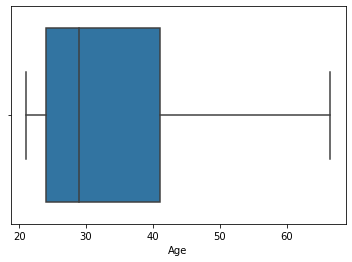

In [38]:
df2 = diabetes["Age"].clip(lower=l_l, upper=u_l)  
#replaceing left outliers with lower limit and right outliers with upper limit 
print(df2)
sns.boxplot(diabetes["Age"].clip(lower=l_l, upper=u_l))
plt.show()

#### droping 

In [42]:
df3 = diabetes.drop([123, 363, 453, 459, 489, 537, 666, 674, 684],axis=0) # dropped the outliers

In [47]:
print(f"{df3.shape},{diabetes.shape}") # dropped the outliers 

(759, 9),(768, 9)


### Capping
Capping is a technique used to deal with outliers in a dataset. It involves setting a maximum or minimum value beyond which data points will not be plotted or included in calculations. This can help to minimize the impact of extreme values on the overall appearance or statistical analysis of the data. Capping can be done in different ways such as by replacing the outlier with the maximum or minimum value or by removing the outlier from the dataset entirely. It is important to note that capping should be used with caution as it can lead to loss of information.

In Python, capping can be achieved using various libraries such as Pandas, Numpy, and Scipy. One way to cap a dataset in pandas is to use the DataFrame.clip() method, which allows you to set a minimum and/or maximum value for each element in the dataframe. For example, the following code will set a minimum value of 0 and a maximum value of 100 for all elements in a dataframe called 'df':

In [30]:
import pandas as pd
import numpy as np
# Creating a sample dataframe
df = pd.DataFrame({
    'A': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'B': [15, 25, 35, 45, 55, 65, 75, 85, 95, 105],
    'C': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
})

# Capping the values of the dataframe by setting a maximum and minimum value
df["A"] = df["A"].clip(lower=35, upper=75)

print(df)

    A    B    C
0  35   15   20
1  35   25   30
2  35   35   40
3  40   45   50
4  50   55   60
5  60   65   70
6  70   75   80
7  75   85   90
8  75   95  100
9  75  105  110


In [31]:
df["B"] = df["B"].clip(lower=35, upper=75)

print(df)

    A   B    C
0  35  35   20
1  35  35   30
2  35  35   40
3  40  45   50
4  50  55   60
5  60  65   70
6  70  75   80
7  75  75   90
8  75  75  100
9  75  75  110


In [32]:
df["C"] = df["C"].clip(lower=35, upper=75)

print(df)

    A   B   C
0  35  35  35
1  35  35  35
2  35  35  40
3  40  45  50
4  50  55  60
5  60  65  70
6  70  75  75
7  75  75  75
8  75  75  75
9  75  75  75


As you can see in this case, any value below 35 and above 75 has been replaced by 35 and 75 respectively.
It's important to note that this process is a trade-off between preserving the integrity of the data and removing the extreme values that may cause a bias in the analysis, so it's important to evaluate the suitability of the capping in each case.

### Mahalanobis distance
The Mahalanobis distance is a distance meaasure between a point and a distribution. It takes into account the correlation between the variables. 